# 01 텍스트 분석 이해

- 지금까지의 ML모델은 주어진 정형 데이터 기반에서 모델을 수립하고 예측을 수행
- 텍스트와 같은 비정형 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미이있는 값을 부여하는가는 중요함


텍스트를 벡터값을 가지는 피처로 변환하는 것을 **피처 벡터화** 또는 피처 추출이라고 함

## 텍스트 분석 수행 프로세스

1.   텍스트 전처리: 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변, 특수문자 삭제 등의 클렌징 작업, 단어 등의 토큰화 작업, 의미없는 단어 제거 작업, 어근 추출 등 텍스트 정규화 작업을 수행하는 것을 통칭
2.   피처 벡터화/추출: 텍스트에서 피처를 추출하고 여기에 벡터값을 할당. 대표적인 방법은 BOW와 Word2Vec이 있다.
3.  ML 모델 수립 및 학습/예측/평가



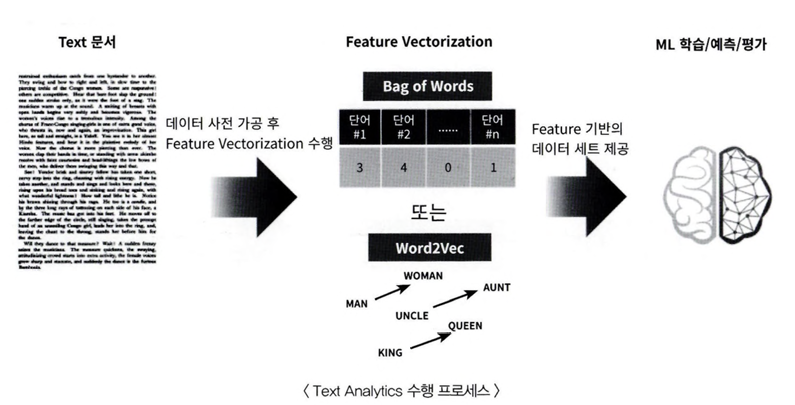

## 파이썬 기반의 NLP, 텍스트 분석 패키지

쉽고 편하게 텍스트 사전 정제 작업, 피처 벡터화/추출, ML 모델을 지원하는 휼륭한 라이브러리가 많다. NLTK, Gensim, SpaCy가 있다. 사이킷런은 예를 들어 '어근 처리'와 같은 NLP 패키지에 특화된 라이브러리는 갖고 있지 않지만, 피처 추출을 위한 편리한 기능을 제공하고 있어 사이킷런으로도 충분히 텍스트 분석 기능을 수행할 수 있다.

# 02 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화


## 클렌징

텍스트 분석에 오히려 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업

## 텍스트 토큰화

문서을 분리하는 문장 토큰화와 문장에서 단어를 토큰으로 분리하는 단어 토큰화로 나눌 수 있음

### 문장 토큰화

문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적

In [ ]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### 단어 토큰화

In [ ]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [ ]:
from nltk import word_tokenize, sent_tokenize

#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):

    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


## 스톱 워드 제거

스톱 워드(stop word)는 분석에 큰 의미가 없는 단어를 지칭한다. 가령 영어에서 is, the, a, will 등 문장을 구성하는 필수문법요소지만 문맥적으로 큰 의미가 없는 단어가 이에 해당함. 이 단어들은 빈번하게 텍스트에 나타나므로 이것들을 사전에 제거하지 않으면 그 빈번함으로 인해 오히려 중요한 단어로 인지될 수 있다.

In [ ]:
import nltk
nltk.download('stopwords') # 언어별로 스톱 워드가 목록화 되어있음

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


In [ ]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다.
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


-> is, the 와 같은 스톱 워드가 필터링으로 제거됐음을 알 수 있다

## Stemming과 Lemmatization

문법적 또는 의미적을 변화하는 단어의 원형을 찾는 것임. 가령 영어의 경우 과거/현재, 3인칭 단수 여부, 진행형 등 매우 많은 조건에 따라 원래 단어가 변화함

Lemmatization이 Stemming보다 정교하며 의미론적인 기반에서 단어의 원형을 찾는다.따라서 변환에 더 오랜시간이 걸림

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


amuse는 amus에 ing, s, ed가 붙으므로 정확한 단어인 amuse가 아닌 amus를 원형 단어로 인식. 형용사인 happy, fancy의 경우도 비교급, 최상급으로 변형된 단어의 정확한 원형을 찾지 못함.

아래는 WordNetLemmatizer를 이용해 Lemmatization을 수행해보자

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# 동사: v, 형용사:a
lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


amuse amuse amuse
happy happy
fancy fancy


# 03 Bag of Words - BOW

모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도값을 부여해 피처 값을 추출하는 모델임. 문서 내 모든 단어를 한꺼번에 봉투(Bag)안에 넣은 뒤 흔들어서 섞는다는 의미로 Bag of Words 모델이라 함

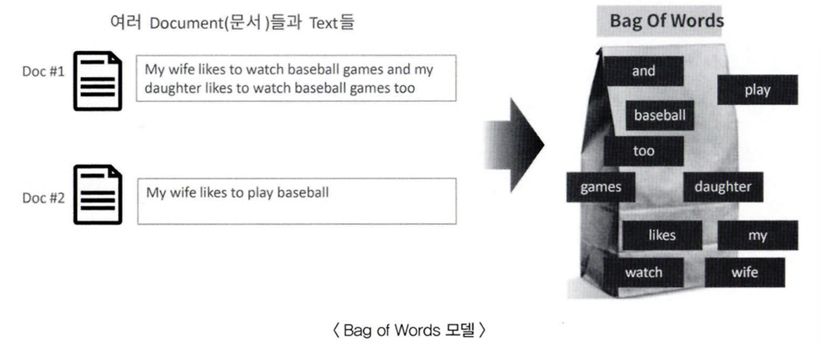

## BOW 피처 벡터화

[2가지 방식]

1. 카운트 기반의 벡터화
2. TF-IDF 기반의 벡터화

카운트 벡터화는 카운트 값이 높을수록 중요한 단어로 인식함. 그러나 카운트만 부여하면 그 문서의 특징을 나타내기보다는 언어의 특성상 문장에서 자주 사용될 수 밖에 없는 단어까지 높은 값을 부여하게 됨

이러한 문제를 보완하기 위해 TF-IDF 벡터화를 사용하는데, 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해선 패널티를 주는 방식으로 값을 부여함

## 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer

CountVectorizer 클래스는 단지 피처 벡터화만 수행하지는 않으며 소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등 텍스트 전처리도 함께 수행 -> 입력 파라미터로!

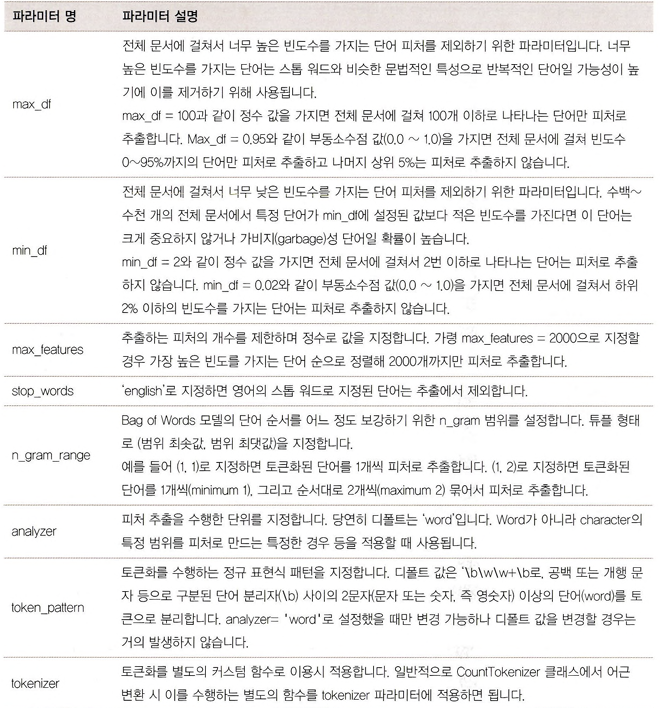

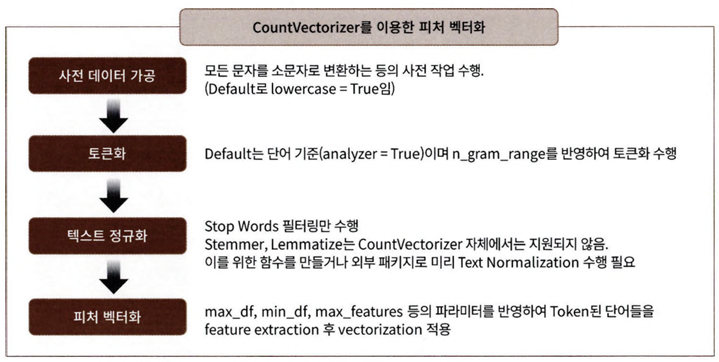

TF-IDF 벡터화는 TfidfVectorizer 클래스를 이용함. 파라미터와 변환방법은 CountVectorizer와 동일함

## BOW 벡터화를 위한 희소 행렬

사이킷런의 CountVectorizer/TfidfVectorizer를 이용해 텍스트를 피처 단위로 벡터화해 변환하고 CSR 형테의 희소 행렬을 반환함

대규모 행렬의 대부분의 값을 0이 차지하는 행렬을 희소 행렬이라고 함. BOW 형태를 가진 언어 모델의 피처 벡터화는 대부분 희소 행렬임

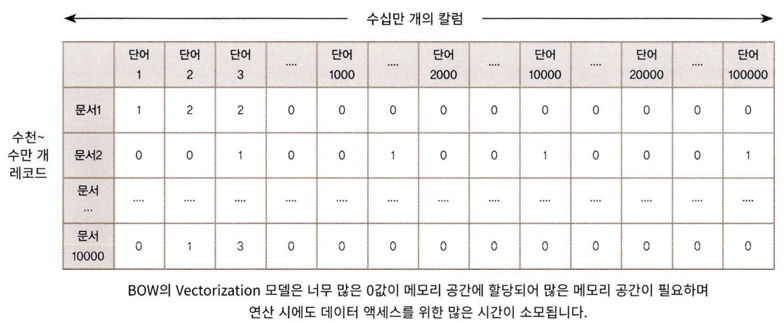

이 희소 행렬은 너무 많은 불필요한 0 값이 메모리 공간에 할당되어 메모리 공간이 많이 필요하고 데이터 엑세스를 위한 시간이 많이 소모됨. 따라서 이러한 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환해야 하는데, 대표적인 방법으로 COO형식과 CSR형식이 있다.

## 희소행렬 - COO 형식

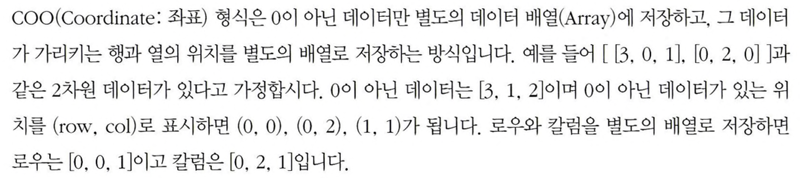

In [ ]:
import numpy as np

dense = np.array( [ [ 3, 0, 1 ], [0, 2, 0 ] ] )

In [ ]:
from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [ ]:
sparse_coo.toarray() # 다시 원래의 데이터 추출

array([[3, 0, 1],
       [0, 2, 0]])

## 희소 행렬 - CSR 형식

CSR 형식은 COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

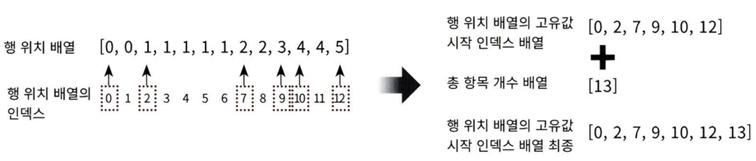

In [ ]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [ ]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)